## Team : G
### Alli Khadga Jyoth - 19024
### Shashank Singh - 19289

#### Q3

In [1]:
import numpy as np 
import cv2

In [5]:
M = np.array([[0.7679,-0.4938,-0.0234,0.0067],[-0.0852,-0.0915,-0.9065,-0.0878],[0.1827,0.2988,-0.0742,1.000]])
M

array([[ 0.7679, -0.4938, -0.0234,  0.0067],
       [-0.0852, -0.0915, -0.9065, -0.0878],
       [ 0.1827,  0.2988, -0.0742,  1.    ]])

In [6]:
H = M[:,:3]
h = M[:,3].reshape(3,1)
H_inv = np.linalg.inv(H)
H_inv

array([[ 0.93072703, -0.14626022,  1.49334069],
       [-0.57636511, -0.1766679 ,  2.3401131 ],
       [-0.02930009, -1.07156483, -0.37656147]])

In [1]:
R_T,K_inv = np.linalg.qr(H_inv)
R_T

NameError: name 'np' is not defined

In [9]:
K_inv

array([[-1.09512923e+00,  2.65373217e-03, -4.76348136e-02],
       [ 0.00000000e+00,  1.09583198e+00, -2.08246122e-01],
       [ 0.00000000e+00,  0.00000000e+00, -2.79327026e+00]])

In [11]:
t = K_inv@h
t

array([[-0.05520518],
       [-0.30446017],
       [-2.79327026]])

### Q18

In [20]:
img = cv2.imread('noisy-grayscale.png')
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY).astype(float)
# img

Denoising the image using median blur as the image has salt-pepper noise

In [26]:
imgf = cv2.medianBlur(img,9)
cv2.imshow('Blurred Image', imgf)
cv2.imwrite('denoise.jpg',imgf)
# cv2.waitKey(0)
# cv2.destroyAllWindows() 

True

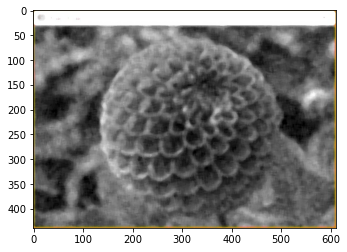

In [33]:
import matplotlib.pyplot as plt
img_de  = cv2.imread('denoise.jpg')
plt.imshow(img_de)

In [34]:
kernel = np.array([[-1.0, -1.0, -1.0], 
                   [-1.0, 8.0, -1.0],
                   [-1.0, -1.0, -1.0]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

#filter the source image
img_hpf = cv2.filter2D(imgf,-1,kernel)

#save result image
cv2.imwrite('denoice_filtered.jpg',img_hpf)

True

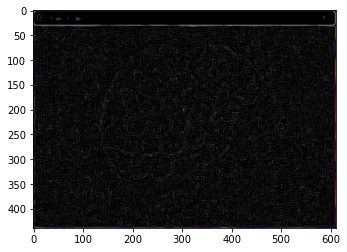

In [35]:
img_hp = cv2.imread('denoice_filtered.jpg')
plt.imshow(img_hp)

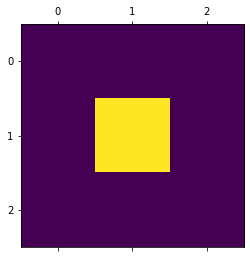

In [37]:
plt.matshow(kernel)

ValueError: not enough values to unpack (expected 3, got 2)

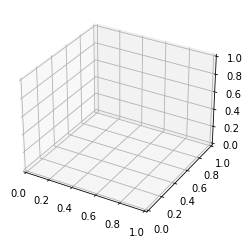

In [39]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = kernel
z, x, y = data.nonzero()
ax.scatter(x, y, z, c=z, alpha=1)
plt.show()

### Q 15

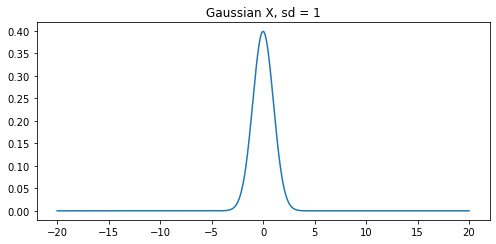

In [47]:
from scipy.stats import norm
import statistics
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-20, 20, 0.01)
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = 1
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.title('Gaussian X, sd = 1')
plt.show()

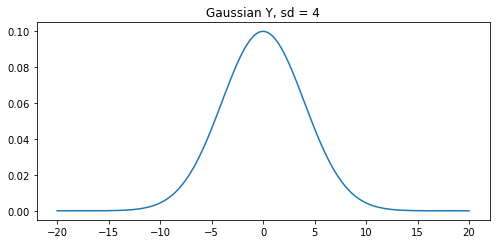

In [48]:
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-20, 20, 0.01)
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
# sd = statistics.stdev(x_axis)
sd = 4
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.title('Gaussian Y, sd = 4')
plt.show()

### Q14

After blurring with box kernal of size (3,3) the first image is only blurred at the edge of gray and blackand the second image is blurred throughout since the boxes are small. So, the second image is more affected  than the frst image. SO the histograms of the images will be different.

### Q9

Rough work

In [50]:
R = np.array([[0.9,0.4,0.1732],[-0.4183,0.9043,0.0854],[-0.1225,-0.1493,0.9812]])
Cw = np.array([[-1],[-2],[-3]])


array([[2.2196],
       [1.6465],
       [2.5225]])

In [51]:
R

array([[ 0.9   ,  0.4   ,  0.1732],
       [-0.4183,  0.9043,  0.0854],
       [-0.1225, -0.1493,  0.9812]])

In [52]:
Cw

array([[-1],
       [-2],
       [-3]])

In [53]:
-R@Cw

array([[2.2196],
       [1.6465],
       [2.5225]])